# OPC UA Pressure Data Visualization  
**Date:** 20.02.2025  
**Author:** Sebastian Pucher  

## Overview  
This Jupyter Notebook is designed to **visualize pressure data** that was previously recorded using the `measure_pressure.py` script.  
It reads **pressure values** from `pressure_log.txt`, processes the data, and generates plots to analyze trends over time.  

## Features  
- **Load and parse** the `pressure_log.txt` file  
- **Convert timestamps** for proper time-series analysis  
- **Plot pressure trends** using Matplotlib  
- **Customize visualization** with colors and labels for better readability  

## Usage  
### 1. Ensure the Log File Exists  
This notebook expects `pressure_log.txt` to be available in the working directory.  
The log file should be structured as follows:

```
2025-02-12 11:28:13, 1.9899999870176543e-09 mbar
2025-02-12 11:28:23, 2.0000000233721948e-09 mbar
2025-02-12 11:29:48, 1.9899999870176543e-09 mbar
2025-02-12 11:29:58, 2.0000000233721948e-09 mbar
2025-02-12 11:30:08, 1.9899999870176543e-09 mbar
2025-02-12 11:30:18, 1.9899999870176543e-09 mbar
2025-02-12 11:30:28, 2.0000000233721948e-09 mbar
```

### 2. Run the Notebook  
- The script will **load and process** the log file  
- Data will be **converted into numerical form** for plotting  
- A **time-series plot** of pressure values will be generated  

# Import necessary libraries

In [6]:
import matplotlib.pyplot as plt  # For data visualization
import matplotlib.dates as mdates  # For handling date-based plotting
from datetime import datetime  # For parsing timestamps

# Load data

In [13]:
# Define file path
file_path = "pressure_log.txt"

# Initialize lists for storing data
timestamps = []
pressures = []

# Read and process the data file
try:
    with open(file_path, "r") as file:
        for line in file:
            try:
                # Split timestamp and pressure value
                timestamp_str, pressure_str = line.strip().split(", ")
                
                # Convert timestamp to datetime object
                timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S")
                
                # Convert pressure value to float (removing " mbar")
                pressure = float(pressure_str.replace(" mbar", ""))
                
                # Append to lists
                timestamps.append(timestamp)
                pressures.append(pressure)
            
            except ValueError as e:
                print(f"Skipping invalid line: {line.strip()} | Error: {e}")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Output first few data points for verification
print("Sample data loaded:")
for i in range(min(5, len(timestamps))):
    print(f"{timestamps[i]} -> {pressures[i]:.6e} mbar")


Sample data loaded:
2025-02-18 13:53:12 -> 5.377023e-04 mbar
2025-02-18 13:53:22 -> 5.394968e-04 mbar
2025-02-18 13:53:32 -> 5.414762e-04 mbar
2025-02-18 13:53:42 -> 5.414262e-04 mbar
2025-02-18 13:53:52 -> 5.382085e-04 mbar


# plot data

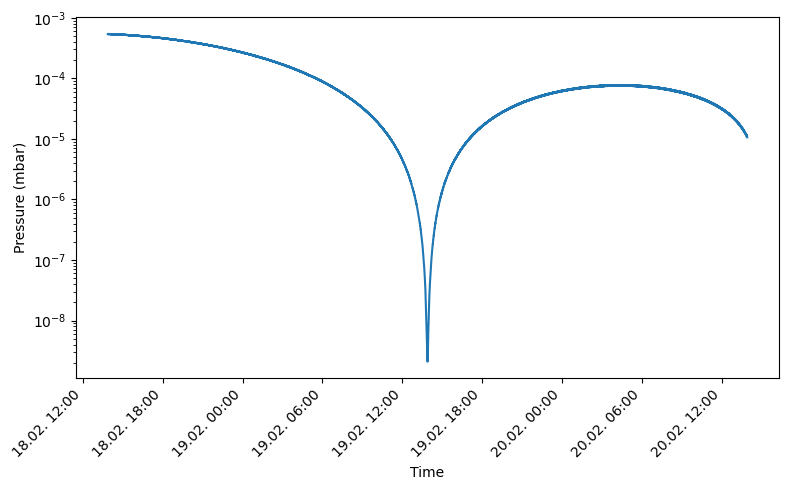

In [14]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))  # Set a reasonable figure size

# Plot the pressure data
ax.plot(timestamps, pressures, color='tab:blue', linestyle='-', markersize=4, label='Pressure')

# Set axis labels
ax.set_xlabel("Time")
ax.set_ylabel("Pressure (mbar)")

# Format x-axis with date formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m. %H:%M'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto adjust ticks for clarity

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Improve layout
fig.tight_layout()

# Show the plot
plt.show()
